In [26]:
import json

with open('results.json') as f:
    results = json.load(f)

In [27]:
import matplotlib.pyplot as plt
import numpy as np

In [28]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 30)
    fig.set_size_inches(40, 7)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [29]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a, _ in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    print("\nTop-n images with largest absolute values of logits:")
    plot_instances(pair["feature"])
    print(100 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. four: 0.9079
	2. red: 0.2950
	3. position: 0.2856
	4. shape: 0.1893
	5. canvas: 0.0723
	6. right: 0.0289
	7. angle: 0.0252
	8. left: 0.0194
	9. up: 0.0095
	10. round: 0.0093
	11. three: 0.0065
	12. green: 0.0014
	13. blank: 0.0011
	14. white: 0.0007
	15. blue: 0.0000
	16. has: 0.0000
	17. is: 0.0000
	18. rotate: 0.0000
	19. this: 0.0000
	20. unrotate: 0.0000
	21. bottom: 0.0000
	22. color: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


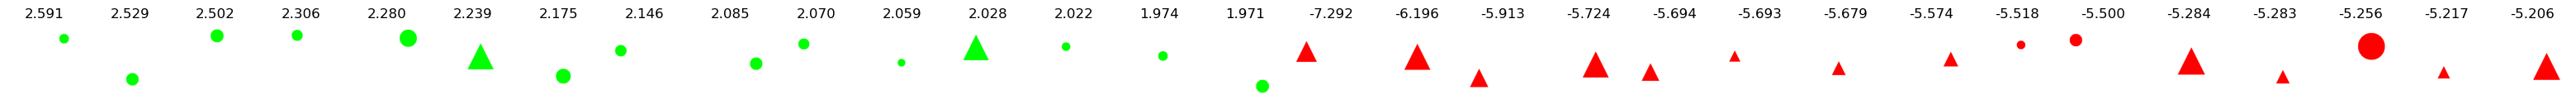

----------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. green: 0.5933
	2. blue: 0.3747
	3. four: 0.3673
	4. this: 0.3388
	5. color: 0.0593
	6. three: 0.0586
	7. canvas: 0.0524
	8. shape: 0.0383
	9. angle: 0.0344
	10. white: 0.0146
	11. left: 0.0105
	12. is: 0.0073
	13. round: 0.0060
	14. rotate: 0.0051
	15. blank: 0.0043
	16. unrotate: 0.0027
	17. red: 0.0003
	18. <pad>: 0.0000
	19. right: 0.0000
	20. up: 0.0000
	21. has: 0.0000
	22. bottom: 0.0000
	23. position: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


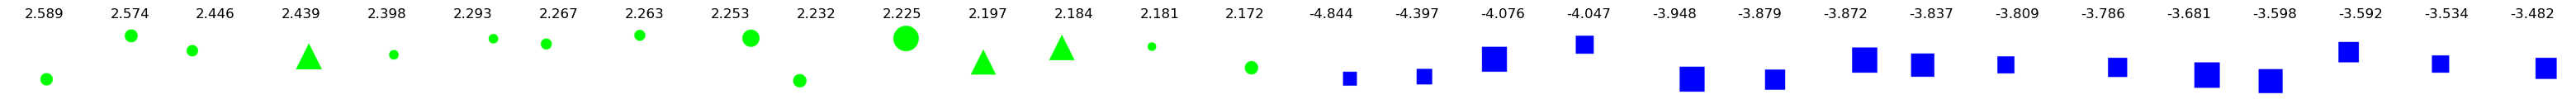

----------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. red: 0.5391
	2. green: 0.4567
	3. three: 0.3493
	4. round: 0.1971
	5. angle: 0.1795
	6. has: 0.1619
	7. is: 0.1231
	8. shape: 0.0863
	9. blue: 0.0828
	10. position: 0.0622
	11. canvas: 0.0196
	12. left: 0.0180
	13. four: 0.0075
	14. color: 0.0072
	15. bottom: 0.0014
	16. rotate: 0.0012
	17. this: 0.0009
	18. right: 0.0004
	19. up: 0.0004
	20. blank: 0.0001
	21. white: 0.0000
	22. unrotate: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


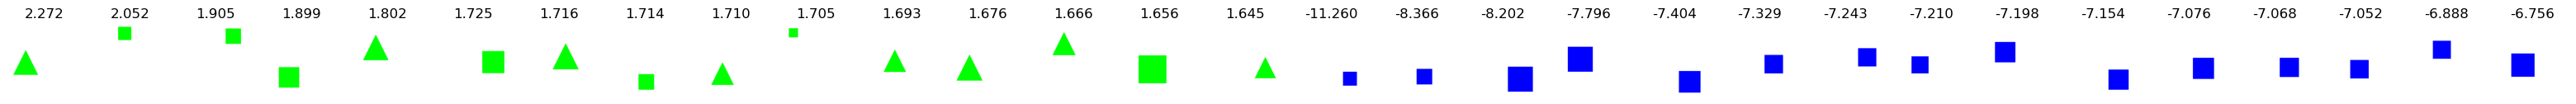

----------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. four: 0.5235
	2. this: 0.3752
	3. is: 0.2009
	4. shape: 0.1352
	5. white: 0.0998
	6. three: 0.0877
	7. up: 0.0846
	8. blank: 0.0826
	9. unrotate: 0.0500
	10. bottom: 0.0358
	11. left: 0.0287
	12. rotate: 0.0248
	13. round: 0.0157
	14. canvas: 0.0068
	15. has: 0.0049
	16. blue: 0.0012
	17. green: 0.0000
	18. <pad>: 0.0000
	19. color: 0.0000
	20. red: 0.0000
	21. angle: 0.0000
	22. right: 0.0000
	23. position: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


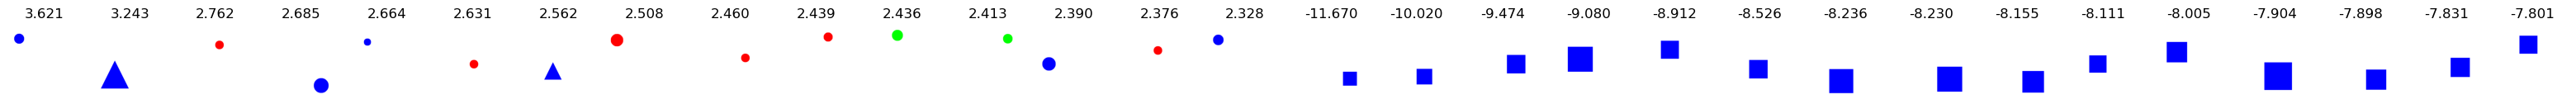

----------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. green: 0.6731
	2. red: 0.5449
	3. has: 0.3644
	4. shape: 0.2055
	5. four: 0.0835
	6. round: 0.0465
	7. color: 0.0370
	8. angle: 0.0246
	9. this: 0.0213
	10. bottom: 0.0193
	11. up: 0.0162
	12. unrotate: 0.0058
	13. left: 0.0035
	14. position: 0.0035
	15. right: 0.0025
	16. is: 0.0004
	17. rotate: 0.0000
	18. white: 0.0000
	19. canvas: 0.0000
	20. blank: 0.0000
	21. blue: 0.0000
	22. three: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


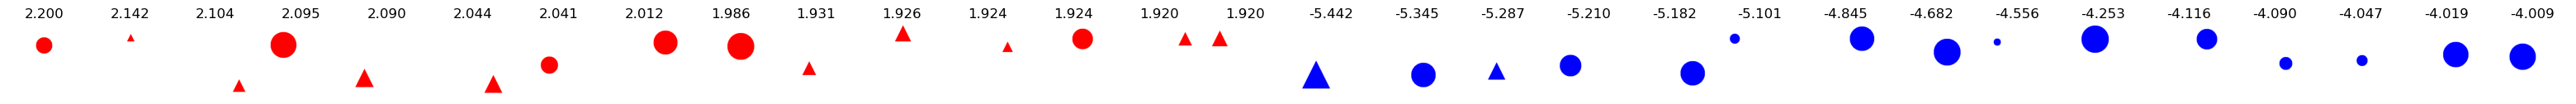

----------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. blue: 0.2914
	2. four: 0.2183
	3. this: 0.2069
	4. angle: 0.1722
	5. shape: 0.1656
	6. position: 0.1638
	7. is: 0.1421
	8. canvas: 0.0947
	9. white: 0.0411
	10. red: 0.0376
	11. green: 0.0038
	12. unrotate: 0.0013
	13. round: 0.0010
	14. bottom: 0.0007
	15. right: 0.0002
	16. up: 0.0000
	17. color: 0.0000
	18. left: 0.0000
	19. blank: 0.0000
	20. has: 0.0000
	21. three: 0.0000
	22. rotate: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


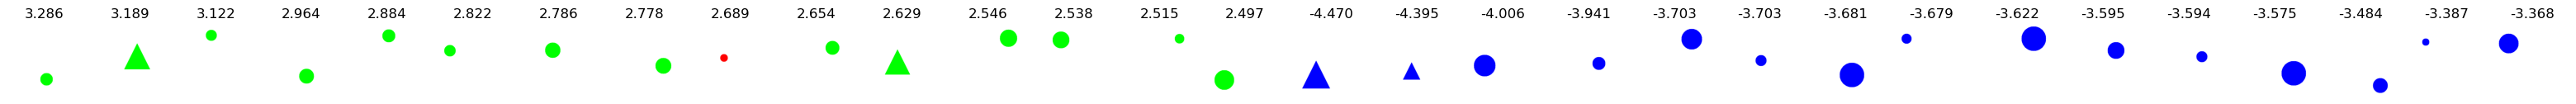

----------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. green: 0.6511
	2. four: 0.3596
	3. red: 0.3140
	4. shape: 0.1877
	5. color: 0.1808
	6. angle: 0.0869
	7. three: 0.0522
	8. is: 0.0426
	9. left: 0.0409
	10. has: 0.0403
	11. canvas: 0.0191
	12. unrotate: 0.0147
	13. right: 0.0143
	14. rotate: 0.0142
	15. up: 0.0123
	16. white: 0.0084
	17. blank: 0.0028
	18. round: 0.0006
	19. blue: 0.0001
	20. <pad>: 0.0000
	21. this: 0.0000
	22. bottom: 0.0000
	23. position: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


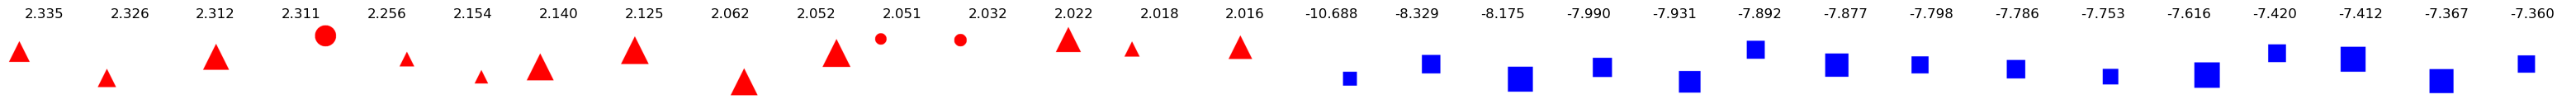

----------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. four: 0.6186
	2. this: 0.3290
	3. blue: 0.2916
	4. color: 0.1954
	5. red: 0.1809
	6. three: 0.0555
	7. up: 0.0539
	8. bottom: 0.0224
	9. rotate: 0.0186
	10. shape: 0.0143
	11. left: 0.0139
	12. blank: 0.0095
	13. position: 0.0088
	14. canvas: 0.0056
	15. is: 0.0055
	16. has: 0.0040
	17. round: 0.0021
	18. angle: 0.0014
	19. white: 0.0005
	20. unrotate: 0.0001
	21. right: 0.0000
	22. green: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


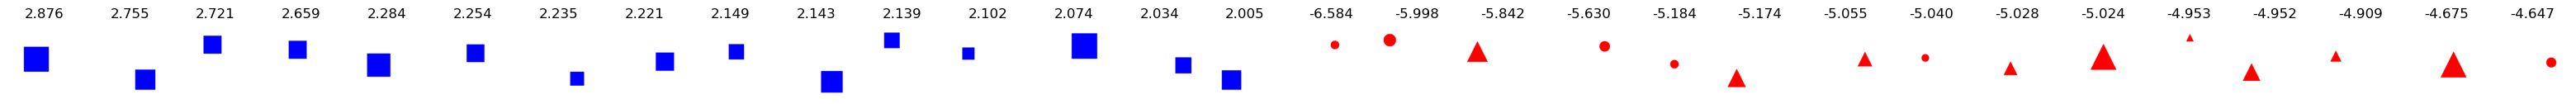

----------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. four: 0.5191
	2. green: 0.3870
	3. blue: 0.3189
	4. red: 0.2369
	5. this: 0.2339
	6. is: 0.1800
	7. angle: 0.1166
	8. round: 0.0761
	9. three: 0.0487
	10. shape: 0.0390
	11. color: 0.0309
	12. left: 0.0224
	13. up: 0.0144
	14. has: 0.0124
	15. rotate: 0.0020
	16. white: 0.0018
	17. position: 0.0010
	18. unrotate: 0.0000
	19. blank: 0.0000
	20. canvas: 0.0000
	21. right: 0.0000
	22. bottom: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


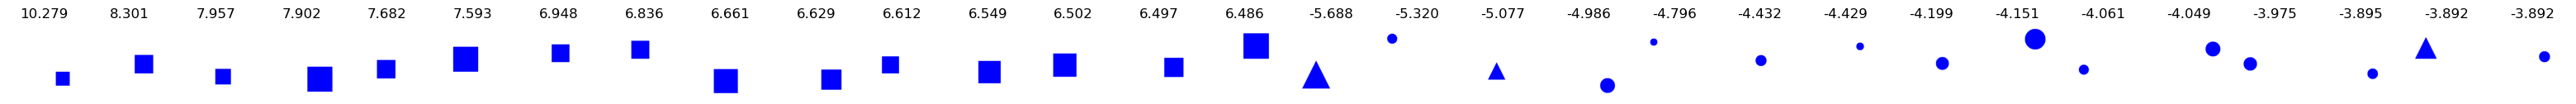

----------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. position: 0.3972
	2. green: 0.3386
	3. canvas: 0.2129
	4. color: 0.1787
	5. shape: 0.0682
	6. left: 0.0324
	7. right: 0.0084
	8. up: 0.0069
	9. white: 0.0042
	10. red: 0.0027
	11. is: 0.0026
	12. unrotate: 0.0021
	13. angle: 0.0015
	14. three: 0.0000
	15. blue: 0.0000
	16. blank: 0.0000
	17. <pad>: 0.0000
	18. rotate: 0.0000
	19. four: 0.0000
	20. has: 0.0000
	21. this: 0.0000
	22. bottom: 0.0000
	23. round: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


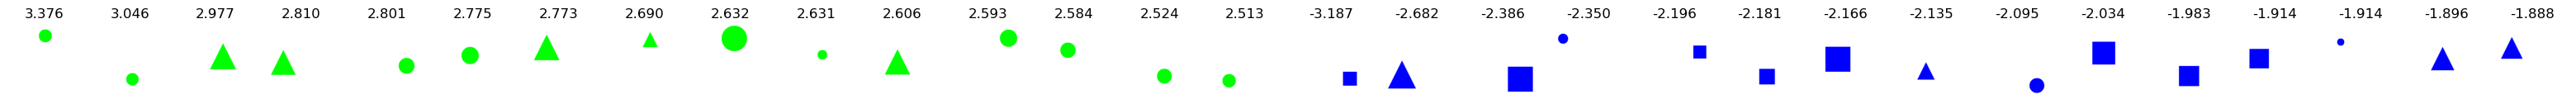

----------------------------------------------------------------------------------------------------


In [30]:
for i in range(10):
    visualize_concept(i)